# Programmeren 2.1

## Les 6.2 -- Plotten met matplotlib

13 Okt 2022

In [1]:
# Maak plot data, niet getoond in slideshow
import numpy as np
import matplotlib.pyplot as plt

n = 801
xrange = (-2.5,1.5)
yrange = (-2j,2j)
c = np.linspace(*xrange,n) + np.linspace(*yrange,n).reshape(-1,1)
z = np.zeros(shape = c.shape, dtype = np.complex128)
im = np.zeros(shape = c.shape, dtype = int)

for i in range(1,30):
    z[abs(z) <= 2] = z[abs(z) <= 2]**2 + c[abs(z) <= 2]
    im[np.logical_and(abs(z) > 2, im == 0)] = i

mandelbrot = im

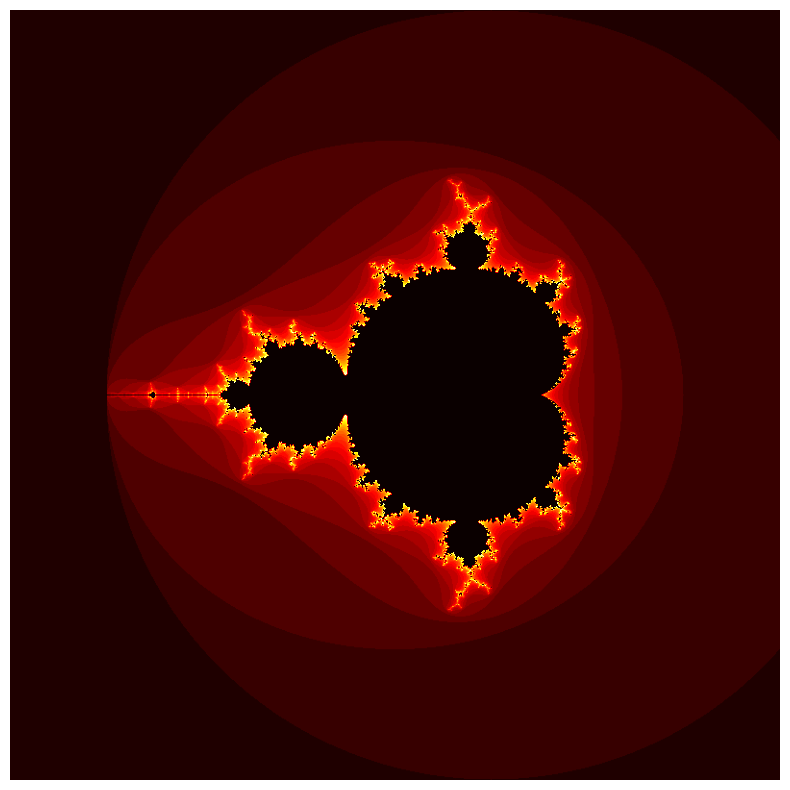

In [2]:
plt.figure(figsize = (10,10))
plt.imshow(mandelbrot, cmap = 'hot')
plt.axis('off')
plt.show()

## Inhoud

- Simpele plots
  - scatter plots
  - bar plots
  - histogrammen
  - plots en pandas
- Complexere plots
  - subplots
  - as-labels, titels
  - legendas
  - plots opslaan
- Programmeerstijl

## Simpele plots

**Matplotlib** is een package dat we gebruiken voor het tekenen van grafieken, figuren, diagrammen, etc...

De documentatie voor **matplotlib** is te vinden op: [https://matplotlib.org/stable/contents.html](https://matplotlib.org/stable/contents.html)

Een gallerij met *veel* voorbeelden van verschillende soorten plots met bijbehorende code is te vinden op: [https://matplotlib.org/stable/gallery/index.html](https://matplotlib.org/stable/gallery/index.html)

In deze les zullen we een korte introductie geven van de basis van plotten.

Het **matplotlib** package wordt standaard als volgt ingeladen:

In [3]:
import matplotlib.pyplot as plt

Een plot commando heeft in het algemeen twee argumenten nodig:
- Een lijst (of tuple, NumPy array, of een kolom uit een pandas dataframe) met $x$-coordinaten
- Een lijst (of tuple, NumPy array, of een kolom uit een pandas dataframe) met $y$-coordinaten

Vervolgens worden de punten $(x_0, y_0), (x_1, y_1), \ldots, (x_{n-1} y_{n-1})$ geplot.
- Na alle plot commandos zal het **plt.show()** commando de plot tonen.

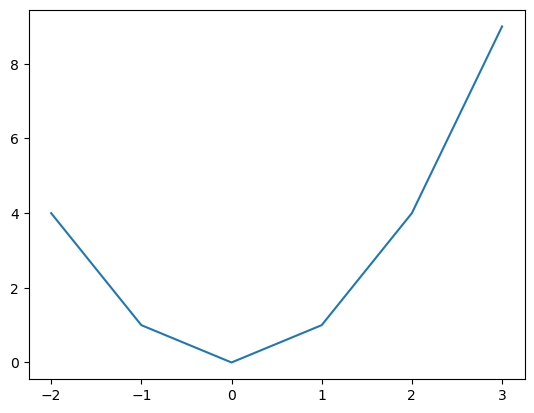

In [4]:
x = [-2, -1, 0, 1, 2, 3]
y = [4, 1, 0, 1, 4, 9]
plt.plot(x, y)
plt.show()

Je kan met een derde **string** argument naar **plot** ook kleur, puntstijl en lijnstijl aangeven:


|   | Kleur |   | Punt |   | Lijn |
|---|:------|---|:-----|---|:-----|
| k | blac**k** | . | kleine punten | - | lijnen |
| r | **r**ed | o | bolletjes | -- | streepjes |
| b | **b**lue ||| -. | streepjes en punten |
| g | **g**reen |||||
| y | **y**ellow |||||

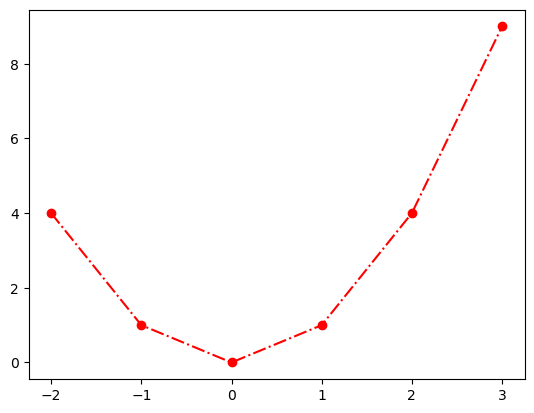

In [5]:
plt.plot(x, y, 'ro-.')
plt.show()

Je kan meerdere dingen tegelijkertijd plotten door:

 meerdere **plot** commando's te gebruiken...

of door alles in één **plot** commando te zetten.

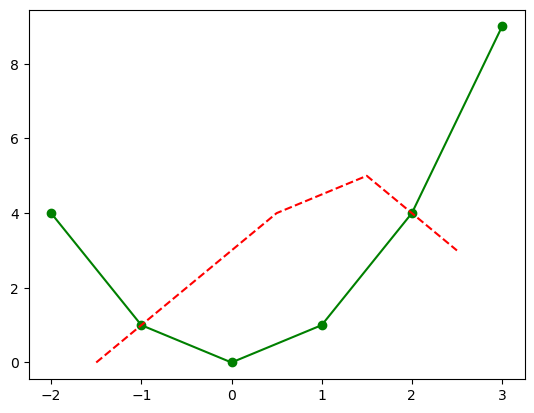

In [6]:
x2 = [-1.5, -0.5, 0.5, 1.5, 2.5]
y2 = [0, 2, 4, 5, 3]
plt.plot(x, y, 'go-')
plt.plot(x2, y2, 'r--')
plt.show()

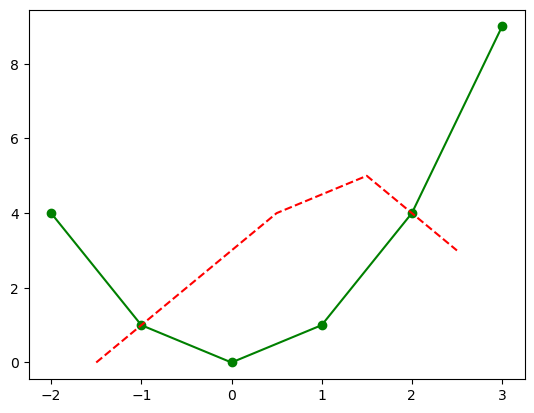

In [7]:
plt.plot(x, y, 'go-', x2, y2, 'r--')
plt.show()

Ook staafdiagrammen (*bar plots*) zijn mogelijk. Hier mag het $x$ argument ook een lijst van **string**s zijn.

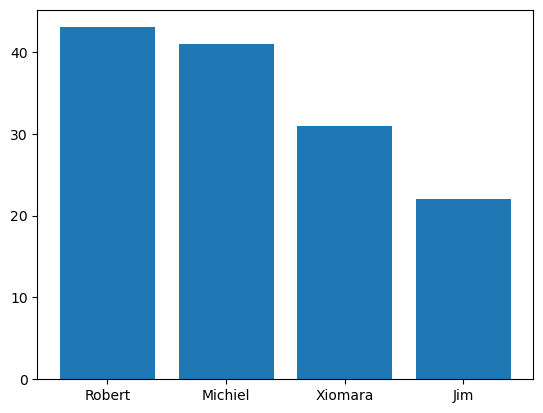

In [8]:
x = ['Robert', 'Michiel', 'Xiomara', 'Jim']
y = [43, 41, 31, 22]
plt.bar(x, y)
plt.show()

Voor de kleur in een staafdiagram kan je óf een enkele kleur meegeven, óf een lijst van kleuren.

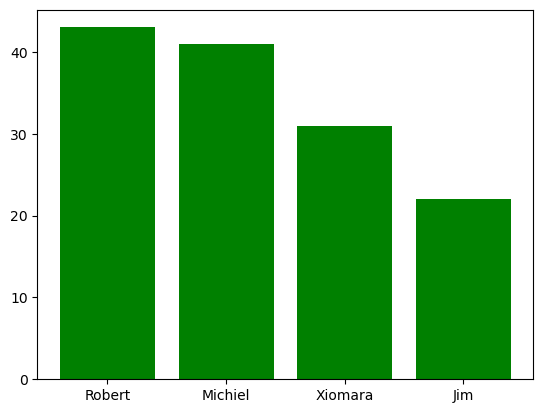

In [9]:
plt.bar(x, y, color = 'g')
plt.show()

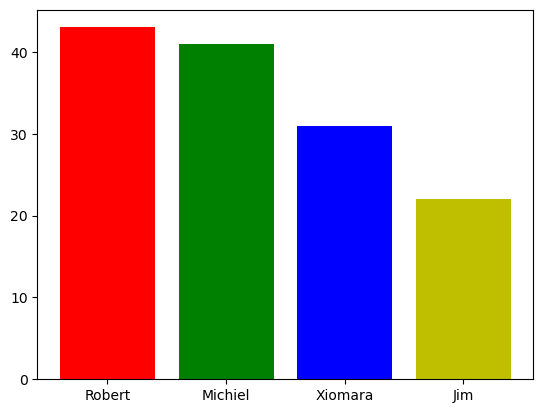

In [10]:
plt.bar(x, y, color = ['r', 'g', 'b', 'y'])
plt.show()

Histogrammen kunnen gemaakt worden met het **hist** commando.

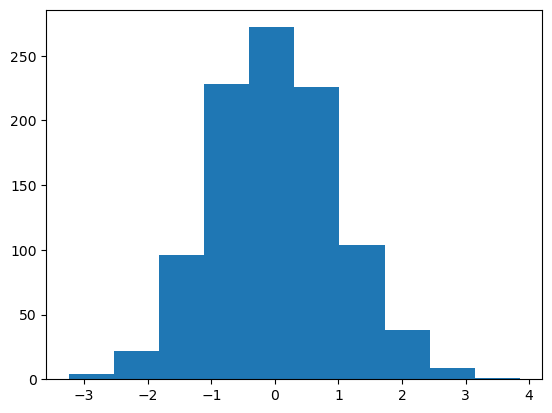

In [11]:
import numpy as np
np.random.seed(42)
# 1000 trekkingen uit een standaardnormaalverdeling
x = np.random.normal(size = 1000)
plt.hist(x)
plt.show()

Met de **bins** optie kan je de hoeveelheid detail in het histogram bepalen. Je kan óf een enkel getal meegeven voor het aantal bins, óf een lijst meegeven met de grenzen van de bins.

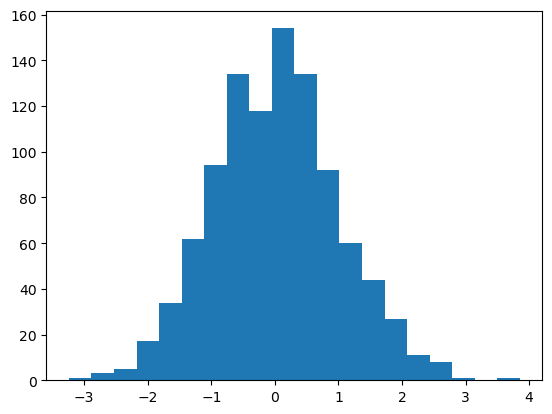

In [12]:
plt.hist(x, bins = 20)
plt.show()

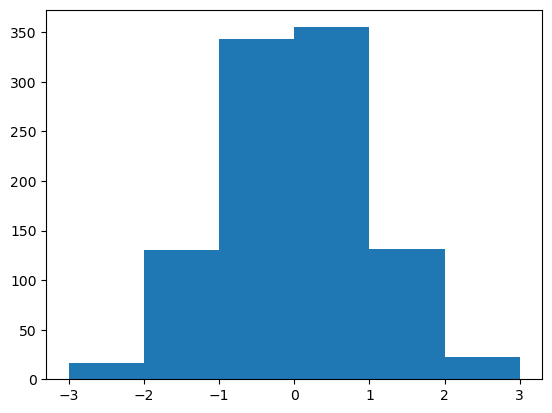

In [13]:
plt.hist(x, bins = [-3, -2, -1, 0, 1, 2, 3])
plt.show()

Je kan ook verschillende soorten plots met elkaar combineren.

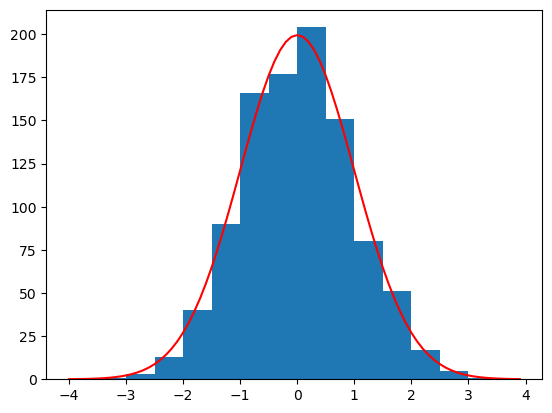

In [14]:
from math import pi
# Rij waardes van -4 tot 4 in stappen van 0.1
x2 = np.arange(-4, 4, 0.1)
# Hoogte van een normaal verdeling bij de waardes van x2
y2 = 500*np.exp(-x2**2/2)/(2*pi)**0.5
plt.hist(x, bins=np.arange(-4, 4, 0.5))
plt.plot(x2, y2, 'r-')
plt.show()

In [15]:
# Download iris data... niet getoond in slides.
from sklearn.datasets import load_iris
import pandas as pd

data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Species'] = [data.target_names[i] for i in data.target]

Matplotlib en pandas kunnen ook fijn samenwerken. De dataframe **df** bevat data over blad en kelk afmetingen van drie verschillende soorten bloemen *iris setosa*, *iris versicolor*, en *iris virginica* (dit is een heel bekende dataset die je wel vaker zal zien.)

In [16]:
display(df)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


Door het dataframe mee te geven aan de plot commandos via het **data** argument, kunnen we naar de verschillende kolommen verwijzen.

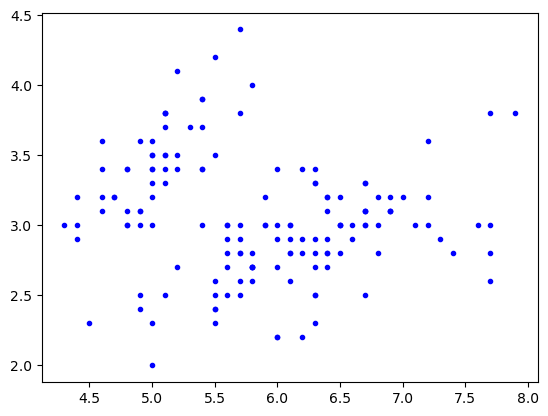

In [17]:
plt.plot('sepal length (cm)', 'sepal width (cm)', 'b.', data = df)
plt.show()

En met de bloemsoort ingekleurd...

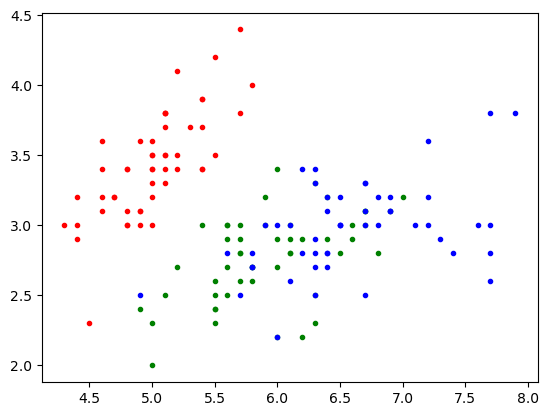

In [18]:
plt.plot('sepal length (cm)', 'sepal width (cm)', 'r.', data = df[df.Species == 'setosa'])
plt.plot('sepal length (cm)', 'sepal width (cm)', 'g.', data = df[df.Species == 'versicolor'])
plt.plot('sepal length (cm)', 'sepal width (cm)', 'b.', data = df[df.Species == 'virginica'])
plt.show()

## Complexere plots

Soms wil je meerdere plots (zogenaamde *subplots*) in het zelfde figuur plaatsen. Het **subplot** commando heeft drie argumenten: het aantal rijen, het aantal kolommen van een grid van plots, en welke plot (genummerd vanaf 1) je wilt selecteren.

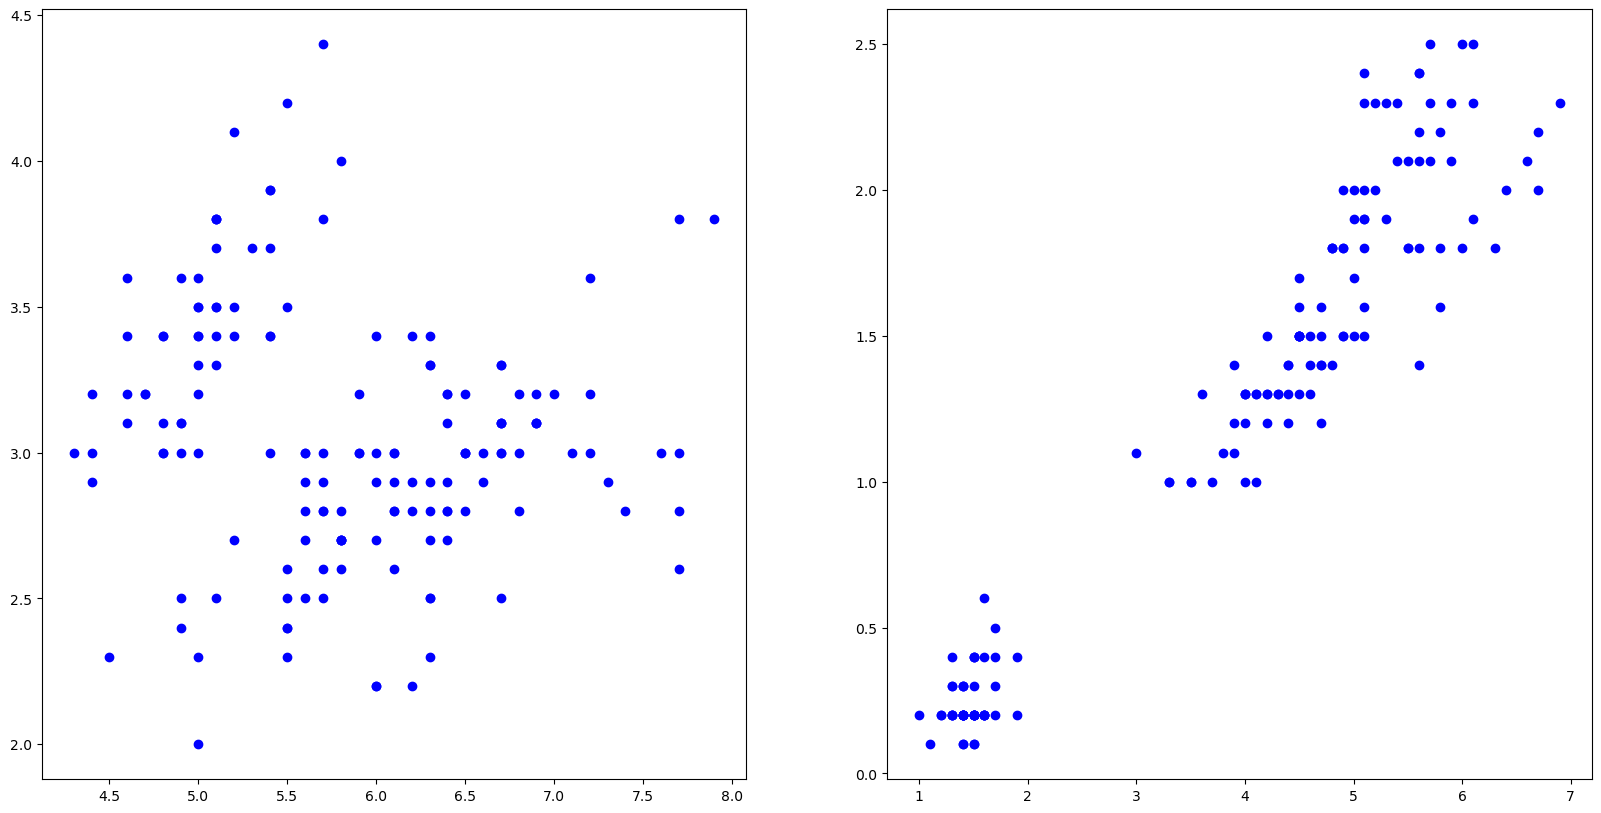

In [19]:
plt.figure(figsize = (20,10))
plt.subplot(1, 2, 1)
plt.plot('sepal length (cm)', 'sepal width (cm)', 'bo', data = df)
plt.subplot(1, 2, 2)
plt.plot('petal length (cm)', 'petal width (cm)', 'bo', data = df)
plt.show()

Nu met inkleuring...

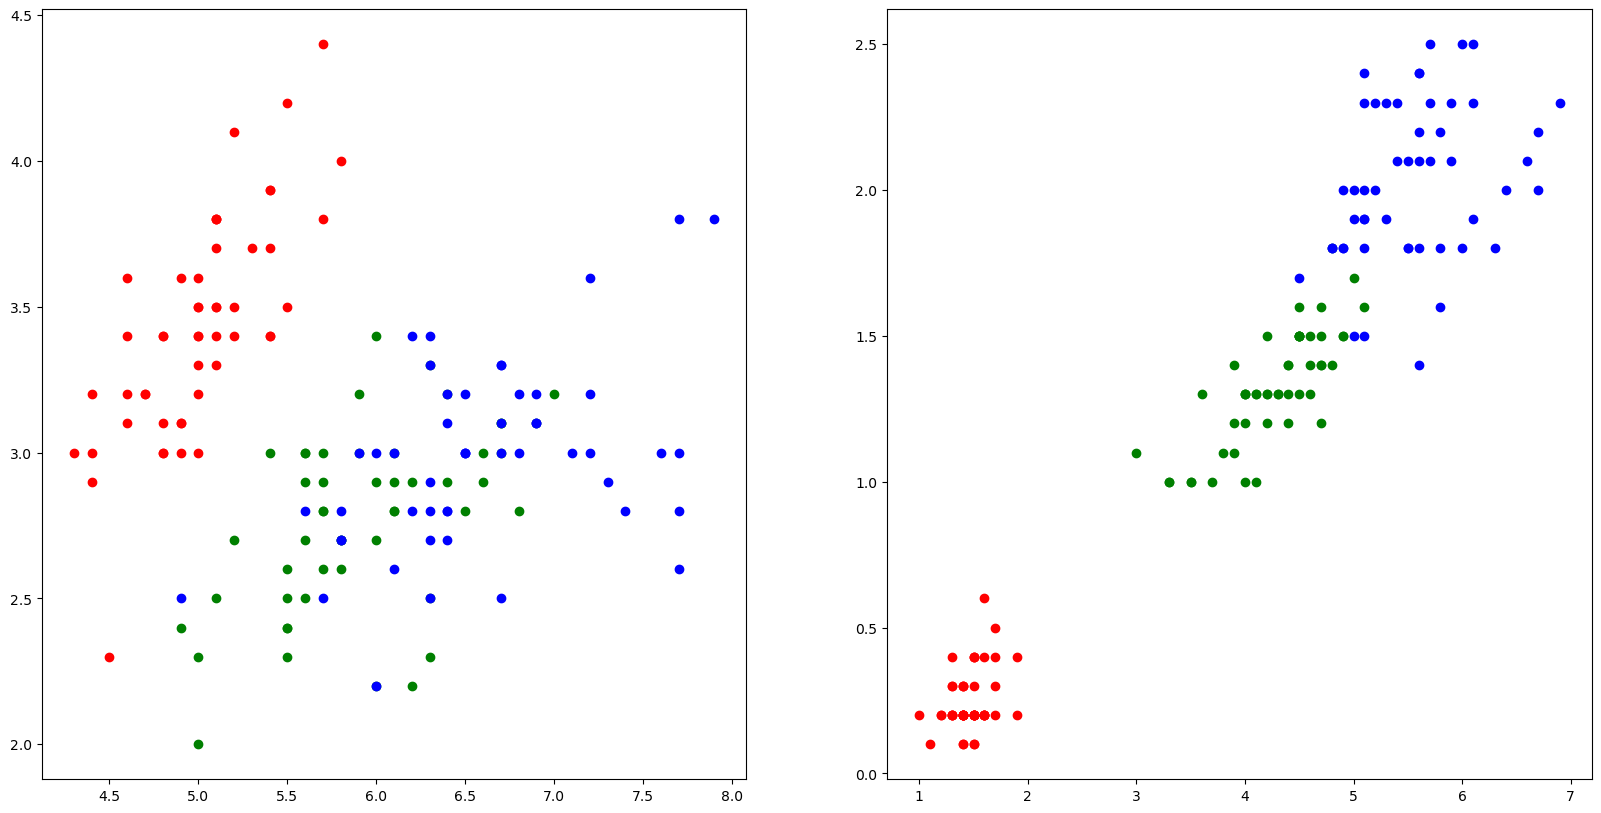

In [20]:
plt.figure(figsize = (20,10))
plt.subplot(1, 2, 1)
plt.plot('sepal length (cm)', 'sepal width (cm)', 'ro', data = df[df.Species == 'setosa'])
plt.plot('sepal length (cm)', 'sepal width (cm)', 'go', data = df[df.Species == 'versicolor'])
plt.plot('sepal length (cm)', 'sepal width (cm)', 'bo', data = df[df.Species == 'virginica'])
plt.subplot(1, 2, 2)
plt.plot('petal length (cm)', 'petal width (cm)', 'ro', data = df[df.Species == 'setosa'])
plt.plot('petal length (cm)', 'petal width (cm)', 'go', data = df[df.Species == 'versicolor'])
plt.plot('petal length (cm)', 'petal width (cm)', 'bo', data = df[df.Species == 'virginica'])
plt.show()

Een plot heeft uiteraard heel veel andere attributen, zoals een titel en as-labels. Deze kan je met de volgende commando's aanmaken:

| Code | Betekenis |
|------|-----------|
| **xlabel** | $x$-as label |
| **ylabel** | $y$-as label |
| **title** | titel |
| **legend** | legenda |

De tekst voor een legenda wordt toegevoegd met het **label =** commando binnen de plot. Je kan plots opslaan met het **savefig** commando, het bestand komt vervolgens in je *working directory* (standaard de map waar je je notebook hebt opgeslagen.)


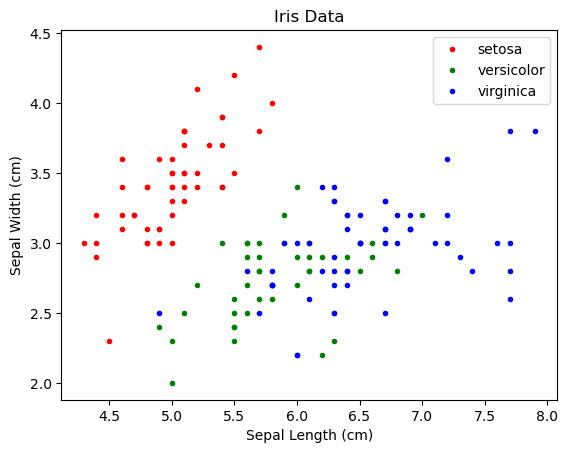

In [21]:
plt.plot('sepal length (cm)', 'sepal width (cm)', 'r.', data = df[df.Species == 'setosa'],     label = 'setosa')
plt.plot('sepal length (cm)', 'sepal width (cm)', 'g.', data = df[df.Species == 'versicolor'], label = 'versicolor')
plt.plot('sepal length (cm)', 'sepal width (cm)', 'b.', data = df[df.Species == 'virginica'],  label = 'virginica')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Iris Data')
plt.legend()
plt.savefig('IrisData.pdf')
plt.show()


## Programmeerstijl

Alle plots zijn voorzien van
- Een titel
- $x$ en $y$-as labels
- Een legenda indien van toepassing